<a href="https://colab.research.google.com/github/soheilpaper/-tft-2.4-ili9341-STM32/blob/master/RAG's/RAG-from-Scratch/Llama3_RAG_for_web_url.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **See full article on [Meduim](https://medium.com/@tharindumadhusanka99/llama3-rag-on-google-colab-73c43aa53281)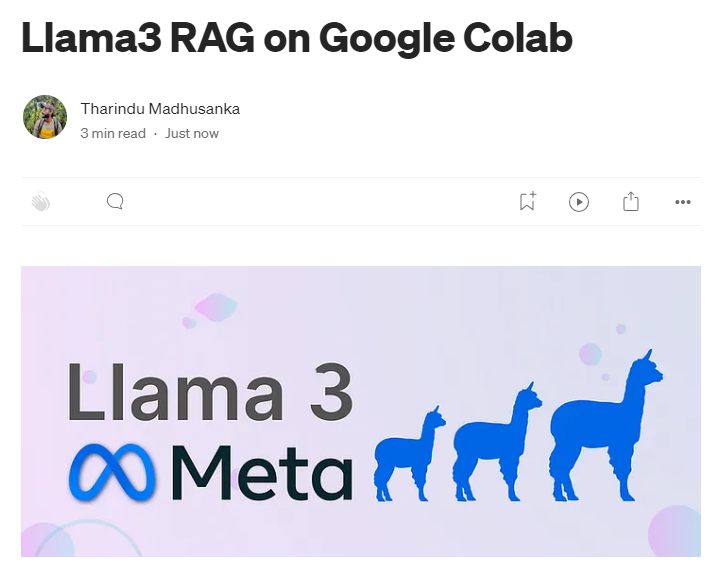**

In [3]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
# type these codes in below terminal after run the cell (%xterm)
! curl -fsSL https://ollama.com/install.sh | sh
#! ollama serve & ollama pull llama3 & ollama pull nomic-embed-text

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
#####################################################                     74.0%

In [ ]:
import subprocess
import threading
import time

def run_ollama_serve():
    # Start ollama serve as a background process
    # stdout and stderr are redirected to avoid cluttering output
    subprocess.Popen(["ollama", "serve"], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

# Start the server thread
thread = threading.Thread(target=run_ollama_serve)
thread.start()

print("Starting ollama serve in background...")
time.sleep(5)  # Wait for the server to initialize

# Pull the models
print("Pulling llama3 model...")
pull_llama3 = subprocess.run(["ollama", "pull", "llama3"], capture_output=True, text=True)
print(pull_llama3.stdout)

print("Pulling nomic-embed-text model...")
pull_nomic = subprocess.run(["ollama", "pull", "nomic-embed-text"], capture_output=True, text=True)
print(pull_nomic.stdout)

print("All done! Ollama server is running in the background and models are pulled.")

In [ ]:

#or run in xterm ...
%xterm

In [ ]:
!pip -qq install langchain
!pip -qq install langchain-core
!pip -qq install langchain-community

In [ ]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3")
llm.invoke("what is the Meaning of life")

In [ ]:
!pip install ollama langchain beautifulsoup4 chromadb gradio -q

In [ ]:
!pip install chromadb

In [ ]:
import gradio as gr
import ollama
from bs4 import BeautifulSoup as bs
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings

# Load the data from the web URL
url = 'https://en.wikipedia.org/wiki/Ohiya'
loader = WebBaseLoader(url)
docs = loader.load()

# Split the loaded documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# Create Ollama embeddings and vector store
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

# Define the function to call the Ollama Llama3 model
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG setup
retriever = vectorstore.as_retriever()

def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, formatted_context)

# Define the Gradio interface
def get_important_facts(question):
    return rag_chain(question)

# Create a Gradio app interface
iface = gr.Interface(
  fn=get_important_facts,
  inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
  outputs="text",
  title="RAG with Llama3",
  description="Ask questions about the proveded context",
)

# Launch the Gradio app
iface.launch()

In [ ]:
import pandas as pd
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
import ollama
import gradio as gr

# Load Excel data
df = pd.read_excel("http://213.188.192.134/files/iran-oil_iran_oil.xlsx")
texts = df['Content'].dropna().tolist()  # Adjust column name accordingly
docs = [Document(page_content=text) for text in texts]

# Split documents
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# Create embeddings and vectorstore
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

# Define retrieval and LLM interaction
retriever = vectorstore.as_retriever()

def ollama_llm(question, context):
    prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': prompt}])
    return response['message']['content']

def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, context)

def get_important_facts(question):
    return rag_chain(question)

iface = gr.Interface(
    fn=get_important_facts,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="RAG with Llama3 on Excel Data",
    description="Ask questions about the provided Excel content",
)

iface.launch()

In [ ]:
!pip install gradio langchain langchain-ollama chromadb beautifulsoup4

In [ ]:
!pip install chromadb==0.4.14

In [ ]:
# Install specific versions compatible with Colab and your code
!pip install --upgrade gradio==3.13.0 langchain langchain-ollama faiss-cpu beautifulsoup4 ollama

In [ ]:
import os
import gradio as gr
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import WebBaseLoader
from langchain.vectorstores import FAISS
from langchain_ollama import OllamaEmbeddings

# Set USER_AGENT environment variable to avoid warnings from WebBaseLoader
os.environ["USER_AGENT"] = "MyRAGApp/1.0 (+https://example.com)"

# Load the data from the web URL
url = 'https://en.wikipedia.org/wiki/Ohiya'
loader = WebBaseLoader(url)
docs = loader.load()

# Split the loaded documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# Create Ollama embeddings and FAISS vector store
embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = FAISS.from_documents(splits, embeddings)

# Define the function to call the Ollama Llama3 model
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the retriever and RAG chain function
retriever = vectorstore.as_retriever()

def rag_chain(question):
    retrieved_docs = retriever.get_relevant_documents(question)
    formatted_context = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return ollama_llm(question, formatted_context)

# Gradio interface function with input validation
def get_important_facts(question):
    if not question.strip():
        return "Please enter a valid question."
    return rag_chain(question)

# Create the Gradio interface
iface = gr.Interface(
    fn=get_important_facts,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="RAG with Llama3",
    description="Ask questions about the provided context from the Wikipedia page on Ohiya.",
)

# Launch the Gradio app with share=True and debug=True for Colab
if __name__ == "__main__":
    iface.launch(share=True, debug=True)